# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "OutputData/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


#Definition calls per set to set multiple calls on the 60 calls per minute in free API:
restritedCalls=60 #Calls per minute
MaxCalls=restritedCalls-5

#Date of the Analysis
AnalysisDate=datetime.date.today()
AnalysisDate=AnalysisDate.strftime('%b/%d/%Y')





## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#URL base for search
url='http://api.openweathermap.org/data/2.5/weather?q='


In [4]:
# set up data frame with cities
RequestOutput=pd.DataFrame({
    'City':cities,
}, index=[cities])

# set up additional columns to hold information

RequestOutput['Cloudiness (%)']=''
RequestOutput['Country']=''
RequestOutput['Date (UTC)']=''
RequestOutput['Humidity (%)']=''
RequestOutput['Lat']=''
RequestOutput['Lng']=''
RequestOutput['Max Tem (F)']=''
RequestOutput['Wind Speed (mph)']=''

#Set the Calls per Set (in free API Key is restricted)

SetCount=1
CallsCountperSet=0
SuccesfulCities=0
UnsuccesfulCities=0

timeStart=time.time() #to stimate a minute between calls

#Loop for the cities and complete the information

print(f'''
Beginning Data Retrieval
-------------------------------------------------------------
''')
for index,city_row in RequestOutput.iterrows():
    
    # request per city
    NameCity=city_row['City']
    EndPoint=f"{url}{NameCity}&appid={weather_api_key}&units=Imperial"
    Request=requests.get(EndPoint).json()
    try:
        #fill information
        RequestOutput.loc[index,'Cloudiness (%)']=Request['clouds']['all']
        RequestOutput.loc[index,'Country']=Request['sys']['country']
        RequestOutput.loc[index,'Date (UTC)']=Request['dt']
        RequestOutput.loc[index,'Humidity (%)']=Request['main']['humidity']
        RequestOutput.loc[index,'Lat']=Request['coord']['lat']
        RequestOutput.loc[index,'Lng']=Request['coord']['lon']
        RequestOutput.loc[index,'Max Tem (F)']=Request['main']['temp_max']
        RequestOutput.loc[index,'Wind Speed (mph)']=Request['wind']['speed']
        
        CallsCountperSet=CallsCountperSet+1
        SuccesfulCities=SuccesfulCities+1
        print(f'Processing Record {SuccesfulCities} of Set {SetCount} | {NameCity}')
    
    except (KeyError, IndexError):
        #in these cases created NaN with numpy
        
        RequestOutput.loc[index,'Cloudiness (%)']=np.nan
        RequestOutput.loc[index,'Country']=np.nan
        RequestOutput.loc[index,'Date (UTC)']=np.nan
        RequestOutput.loc[index,'Humidity (%)']=np.nan
        RequestOutput.loc[index,'Lat']=np.nan
        RequestOutput.loc[index,'Lng']=np.nan
        RequestOutput.loc[index,'Max Tem (F)']=np.nan
        RequestOutput.loc[index,'Wind Speed (mph)']= np.nan      
         
        CallsCountperSet=CallsCountperSet+1
        UnsuccesfulCities=UnsuccesfulCities+1
        print(f'City not found: {NameCity}. Skipping..')
    
    if CallsCountperSet==MaxCalls:
    
        SetCount=SetCount+1
        CallsCountperSet=0
        SuccesfulCities=0
        timeEnd=time.time()
        time.sleep(60-(timeEnd-timeStart)) #Wait for next minute
        timeStart=time.time()
print(f'''
------------------------------------------------------------
Data Retrieval Complete
-------------------------------------------------------------
''')
print(f''' 
Succesful Records: {len(cities)-UnsuccesfulCities}
Skippig cities: {UnsuccesfulCities}
''')



Beginning Data Retrieval
-------------------------------------------------------------

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | faanui
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | port macquarie
Processing Record 7 of Set 1 | kuah
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | la rioja
City not found: attawapiskat. Skipping..
Processing Record 10 of Set 1 | cabedelo
Processing Record 11 of Set 1 | horta
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kapit
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | culiacancito
Processing Record 17 of Set 1 | nelson
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | durres
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | srednekolymsk
Processing Record

Processing Record 30 of Set 4 | gazanjyk
Processing Record 31 of Set 4 | chanika
Processing Record 32 of Set 4 | makakilo city
Processing Record 33 of Set 4 | la macarena
Processing Record 34 of Set 4 | padang
Processing Record 35 of Set 4 | parabel
Processing Record 36 of Set 4 | lazaro cardenas
Processing Record 37 of Set 4 | carutapera
Processing Record 38 of Set 4 | porto santo
Processing Record 39 of Set 4 | la palma
City not found: tabiauea. Skipping..
Processing Record 40 of Set 4 | necochea
Processing Record 41 of Set 4 | tigzirt
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | nara
City not found: belushya guba. Skipping..
Processing Record 44 of Set 4 | aklavik
Processing Record 45 of Set 4 | las palmas
Processing Record 46 of Set 4 | mogadishu
Processing Record 47 of Set 4 | meulaboh
Processing Record 48 of Set 4 | bastia
Processing Record 49 of Set 4 | jinchang
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | kangaatsiaq
Proces

City not found: viligili. Skipping..
Processing Record 14 of Set 8 | ust-ishim
Processing Record 15 of Set 8 | awjilah
Processing Record 16 of Set 8 | karratha
Processing Record 17 of Set 8 | san cristobal
Processing Record 18 of Set 8 | kijang
Processing Record 19 of Set 8 | ciudad bolivar
City not found: karmana. Skipping..
Processing Record 20 of Set 8 | birobidzhan
Processing Record 21 of Set 8 | santiago
Processing Record 22 of Set 8 | corrales
Processing Record 23 of Set 8 | atherton
Processing Record 24 of Set 8 | manzil kamil
Processing Record 25 of Set 8 | creel
Processing Record 26 of Set 8 | hovd
City not found: milingimbi. Skipping..
Processing Record 27 of Set 8 | olafsvik
Processing Record 28 of Set 8 | puerto leguizamo
Processing Record 29 of Set 8 | sile
Processing Record 30 of Set 8 | gamba
Processing Record 31 of Set 8 | erenhot
Processing Record 32 of Set 8 | lagunillas
Processing Record 33 of Set 8 | kaili
Processing Record 34 of Set 8 | deputatskiy
Processing Recor

Processing Record 48 of Set 11 | zinder
Processing Record 49 of Set 11 | torbay
Processing Record 50 of Set 11 | pontes e lacerda
Processing Record 51 of Set 11 | watsa
Processing Record 52 of Set 11 | winnemucca
Processing Record 1 of Set 12 | coihaique
Processing Record 2 of Set 12 | aykhal
Processing Record 3 of Set 12 | araouane
Processing Record 4 of Set 12 | kabinda
Processing Record 5 of Set 12 | tarata
Processing Record 6 of Set 12 | kaeo
Processing Record 7 of Set 12 | le port
Processing Record 8 of Set 12 | fayaoue
Processing Record 9 of Set 12 | rawson
Processing Record 10 of Set 12 | ahuimanu
City not found: kamenskoye. Skipping..
Processing Record 11 of Set 12 | gondanglegi
Processing Record 12 of Set 12 | gao
Processing Record 13 of Set 12 | mashhad

------------------------------------------------------------
Data Retrieval Complete
-------------------------------------------------------------

 
Succesful Records: 573
Skippig cities: 46



In [5]:
RequestOutput=RequestOutput.dropna()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
RequestOutput.to_csv(output_data_file, sep=',', index=False, encoding="utf-8")

In [7]:
RequestOutput.head()

,City,Cloudiness (%),Country,Date (UTC),Humidity (%),Lat,Lng,Max Tem (F),Wind Speed (mph)
busselton,busselton,27,AU,1603614734,31,-33.65,115.33,84,5.01
faanui,faanui,44,PF,1603614734,71,-16.48,-151.75,79.52,2.8
bredasdorp,bredasdorp,100,ZA,1603614734,60,-34.53,20.04,69.8,4.7
barrow,barrow,90,US,1603614735,68,71.29,-156.79,28.4,8.05
kapaa,kapaa,1,US,1603614735,88,22.08,-159.32,75.2,4.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

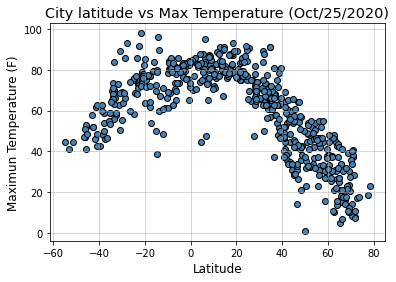

In [8]:
#Plot 
plt.scatter(RequestOutput['Lat'],RequestOutput['Max Tem (F)'], color='black', marker='o', facecolor='steelblue')
plt.title(f'City latitude vs Max Temperature ({AnalysisDate})', fontsize='x-large')
plt.xlabel(f'Latitude', fontsize='large')
plt.ylabel(f'Maximun Temperature (F)', fontsize='large')
plt.grid(lw=0.5)
plt.savefig('OutputData/LatVSMaxTemp.png')
plt.show()


#### Latitude vs. Humidity Plot

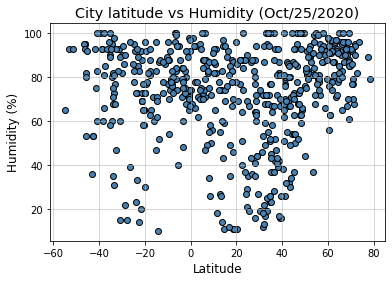

In [9]:
#Plot 
plt.scatter(RequestOutput['Lat'],RequestOutput['Humidity (%)'], color='black', marker='o', facecolor='steelblue')
plt.title(f'City latitude vs Humidity ({AnalysisDate})', fontsize='x-large')
plt.xlabel(f'Latitude', fontsize='large')
plt.ylabel(f'Humidity (%)', fontsize='large')
plt.grid(lw=0.5)
plt.savefig('OutputData/LatvsHumidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

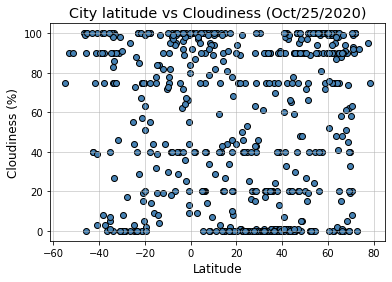

In [10]:
#Plot 
plt.scatter(RequestOutput['Lat'],RequestOutput['Cloudiness (%)'], color='black', marker='o', facecolor='steelblue')
plt.title(f'City latitude vs Cloudiness ({AnalysisDate})', fontsize='x-large')
plt.xlabel(f'Latitude', fontsize='large')
plt.ylabel(f'Cloudiness (%)', fontsize='large')
plt.grid(lw=0.5)
plt.savefig('OutputData/LatvsCloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

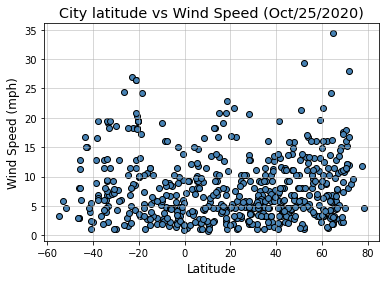

In [11]:
#Plot 
plt.scatter(RequestOutput['Lat'],RequestOutput['Wind Speed (mph)'], color='black', marker='o', facecolor='steelblue')
plt.title(f'City latitude vs Wind Speed ({AnalysisDate})', fontsize='x-large')
plt.xlabel(f'Latitude', fontsize='large')
plt.ylabel(f'Wind Speed (mph)', fontsize='large')
plt.grid(lw=0.5)
plt.savefig('OutputData/LatvsWindSpeed.png')
plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

def RegressFuntion(serie_x,serie_y, title, x_label, y_label,save_name):  
    #
    x_values=pd.to_numeric(serie_x)
    y_values=pd.to_numeric(serie_y)
    (slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_value=rvalue
    
    
    plt.scatter(x_values,y_values, color='grey', marker='o', facecolor='white')
    plt.title(f'{title}', fontsize='x-large')
    plt.plot(x_values,regress_values,color="blue")
    plt.annotate(f'{line_eq}',(x_values.mean(),y_values.min()), fontsize='x-large', color="red", alpha=1)                           
    plt.xlabel(f'{x_label}', fontsize='large')
    plt.ylabel(f'{y_label}', fontsize='large')
    plt.grid(lw=0.5)
    print(f'The r-squared is: {r_value:.4f}')
    plt.savefig(f'OutputData/{save_name}.png')   
     
    
    return plt.show()





In [13]:
# Create Northern and Southern Hemisphere DataFrames
NorthernFrame=RequestOutput.loc[lambda RequestOutput:RequestOutput['Lat']>=0] #Northern Hemisphere (greater than or equal to 0 degrees latitude)
SoutherFrame=RequestOutput.loc[lambda RequestOutput:RequestOutput['Lat']<0] #Southern Hemisphere (less than 0 degrees latitude)



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8722


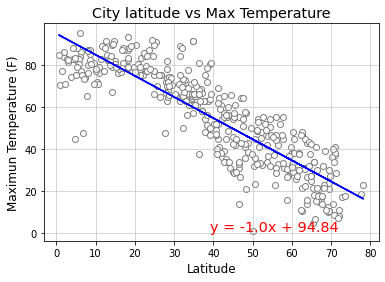

In [14]:
# linear regression equation and line to plot
RegressFuntion(NorthernFrame['Lat'],NorthernFrame['Max Tem (F)'],'City latitude vs Max Temperature','Latitude','Maximun Temperature (F)','NH_LatVSMaxTemp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6724


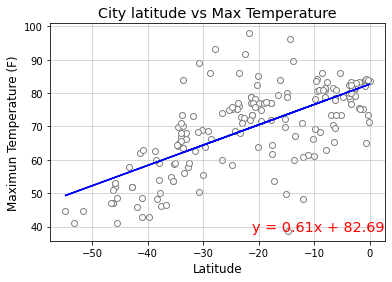

In [15]:
RegressFuntion(SoutherFrame['Lat'],SoutherFrame['Max Tem (F)'],'City latitude vs Max Temperature','Latitude','Maximun Temperature (F)','SH_LatVSMaxTemp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3022


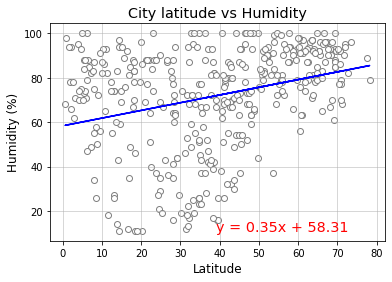

In [16]:
RegressFuntion(NorthernFrame['Lat'],NorthernFrame['Humidity (%)'],'City latitude vs Humidity','Latitude','Humidity (%)','NH_LatVSHumidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0067


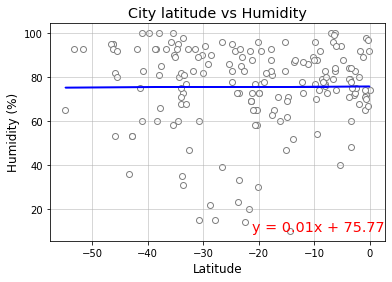

In [17]:
RegressFuntion(SoutherFrame['Lat'],SoutherFrame['Humidity (%)'],'City latitude vs Humidity','Latitude','Humidity (%)','SH_LatVSHumidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1474


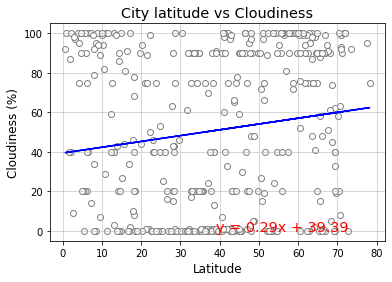

In [18]:
RegressFuntion(NorthernFrame['Lat'],NorthernFrame['Cloudiness (%)'],'City latitude vs Cloudiness','Latitude','Cloudiness (%)','NH_LatVSCloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0338


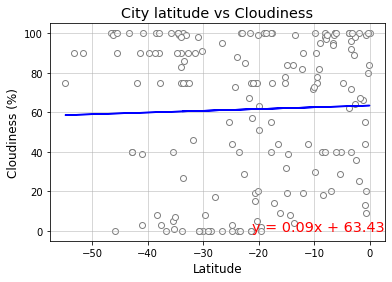

In [19]:
RegressFuntion(SoutherFrame['Lat'],SoutherFrame['Cloudiness (%)'],'City latitude vs Cloudiness','Latitude','Cloudiness (%)','SH_LatVSCloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1651


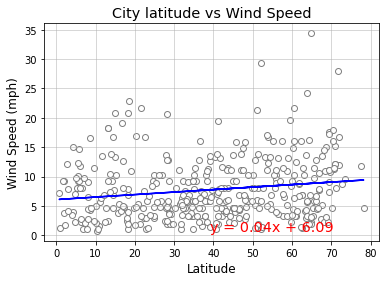

In [20]:
RegressFuntion(NorthernFrame['Lat'],NorthernFrame['Wind Speed (mph)'],'City latitude vs Wind Speed','Latitude','Wind Speed (mph)','NH_LatVSWindSpeed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1472


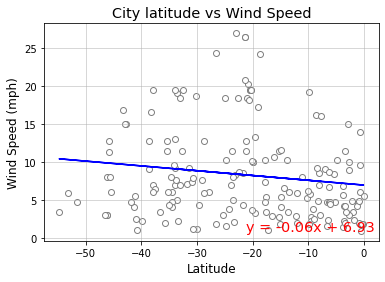

In [21]:
RegressFuntion(SoutherFrame['Lat'],SoutherFrame['Wind Speed (mph)'],'City latitude vs Wind Speed','Latitude','Wind Speed (mph)','SH_LatVSWindSpeed')